### Hope Air Quality Analysis

In [56]:
# import the needed library
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')


## Importing  the  Data

In [57]:
# reading the csv file for Tuen Mun months
Hope_Cananda_2024= pd.read_csv('Hope Air Quality _Data.csv')
Hope_Cananda_2024

,location_id,location_name,parameter,value,unit,DatetimeUtc,DatetimeLocal,timezone,latitude,longitude,country_iso,is_Mobile,is_Monitor,owner_name,provider
0,1364,Hope,co,18.82,µg/m³,2024-01-01 01:00:00+00:00,2023-12-31 17:00:00-08:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
1,1364,Hope,co,28.22,µg/m³,2024-01-01 02:00:00+00:00,2023-12-31 18:00:00-08:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
2,1364,Hope,co,13.92,µg/m³,2024-01-01 03:00:00+00:00,2023-12-31 19:00:00-08:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
3,1364,Hope,co,16.75,µg/m³,2024-01-01 04:00:00+00:00,2023-12-31 20:00:00-08:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
4,1364,Hope,co,15.43,µg/m³,2024-01-01 05:00:00+00:00,2023-12-31 21:00:00-08:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,1364,Hope,pm25,3.60,µg/m³,2024-06-11 23:00:00+00:00,2024-06-11 16:00:00-07:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
10131,1364,Hope,pm25,3.50,µg/m³,2024-06-12 00:00:00+00:00,2024-06-11 17:00:00-07:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
10132,1364,Hope,pm25,2.20,µg/m³,2024-06-12 01:00:00+00:00,2024-06-11 18:00:00-07:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow
10133,1364,Hope,pm25,1.50,µg/m³,2024-06-12 02:00:00+00:00,2024-06-11 19:00:00-07:00,America/Vancouver,49.36972,-121.49944,NaN,NaN,NaN,Unknown Governmental Organization,AirNow


### Describing the data.

In [58]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{Hope_Cananda_2024.shape}')

# showing the information about the dataset.
Hope_Cananda_2024.info()

The Tuen Mun dataset is made up of(10135, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10135 entries, 0 to 10134
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    10135 non-null  int64  
 1   location_name  10135 non-null  object 
 2   parameter      10135 non-null  object 
 3   value          10135 non-null  float64
 4   unit           10135 non-null  object 
 5   DatetimeUtc    10135 non-null  object 
 6   DatetimeLocal  10135 non-null  object 
 7   timezone       10135 non-null  object 
 8   latitude       10135 non-null  float64
 9   longitude      10135 non-null  float64
 10  country_iso    0 non-null      float64
 11  is_Mobile      0 non-null      float64
 12  is_Monitor     0 non-null      float64
 13  owner_name     10135 non-null  object 
 14  provider       10135 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.2+ MB


### Data Cleaning

### This process will involve the following steps:

#Dropping unneccesary columns.

#Handling missing values.

#Removing duplicates.

#Concerting datetimeLocal and datetimeUtc to a pandas datetime

#Setting datetimeLocal and datetimeUtc as index

#Creating a pivot table for the with the pollutants as the column and the 

#datetimeUtc as index

In [59]:
# drop the unnecessary columns
"""
Cell generated by Data Wrangler.
"""
def clean_data(Hope_Cananda_2024):
    # Drop column: 'country_iso'
    Hope_Cananda_2024= Hope_Cananda_2024.drop(columns=['country_iso'])
    # Drop column: 'isMobile'
    Hope_Cananda_2024= Hope_Cananda_2024.drop(columns=['is_Mobile'])
    # Drop column: 'isMonitor'
    Hope_Cananda_2024= Hope_Cananda_2024.drop(columns=['is_Monitor'])
    # Drop column: 'owner_name'
    Hope_Cananda_2024= Hope_Cananda_2024.drop(columns=['owner_name'])
    # Drop column: 'provider'
    Hope_Cananda_2024= Hope_Cananda_2024.drop(columns=['provider'])
    return Hope_Cananda_2024
Hope_Cananda_2024= clean_data(Hope_Cananda_2024).copy()
Hope_Cananda_2024.head()

,location_id,location_name,parameter,value,unit,DatetimeUtc,DatetimeLocal,timezone,latitude,longitude
0,1364,Hope,co,18.82,µg/m³,2024-01-01 01:00:00+00:00,2023-12-31 17:00:00-08:00,America/Vancouver,49.36972,-121.49944
1,1364,Hope,co,28.22,µg/m³,2024-01-01 02:00:00+00:00,2023-12-31 18:00:00-08:00,America/Vancouver,49.36972,-121.49944
2,1364,Hope,co,13.92,µg/m³,2024-01-01 03:00:00+00:00,2023-12-31 19:00:00-08:00,America/Vancouver,49.36972,-121.49944
3,1364,Hope,co,16.75,µg/m³,2024-01-01 04:00:00+00:00,2023-12-31 20:00:00-08:00,America/Vancouver,49.36972,-121.49944
4,1364,Hope,co,15.43,µg/m³,2024-01-01 05:00:00+00:00,2023-12-31 21:00:00-08:00,America/Vancouver,49.36972,-121.49944


In [60]:
# checking for duplicate values
dup = Hope_Cananda_2024.duplicated().sum()
print(f'The number of duplicated values is: {dup}')

# converting datetime for Utc and Local to datetime format
Hope_Cananda_2024['datetimeUtc'] = pd.to_datetime(Hope_Cananda_2024['DatetimeUtc'])
Hope_Cananda_2024['datetimeLocal'] = pd.to_datetime(Hope_Cananda_2024['DatetimeLocal'])

The number of duplicated values is: 0


In [61]:
# creating a pivot table
Hope_Cananda_2024_table = Hope_Cananda_2024.pivot_table(
    values='value',
    index=['datetimeLocal', 'datetimeUtc'],
    columns='parameter'
)
# resetting the index for readability
Hope_Cananda_2024_table.reset_index(inplace=True)

# filling the missing value with 0
Hope_Cananda_2024_table = Hope_Cananda_2024_table.fillna(0)

### Descriptive statistics

In [62]:
#describing the Hope_Cananda_2024_table
desc = [Hope_Cananda_2024_table['co'].describe(),Hope_Cananda_2024_table['o3'].describe(),Hope_Cananda_2024_table['pm10'].describe(),Hope_Cananda_2024_table['pm25'].describe()]
desc = pd.DataFrame(desc)
print("The descriptive statistics for the pollutants is:", '\n', desc)

# displaying the first 5 obs.
Hope_Cananda_2024_table.head()

The descriptive statistics for the pollutants is: 
        count       mean        std  min    25%    50%    75%     max
co    3045.0  11.338883   7.112354  0.0   6.02   9.22  15.24   45.16
o3    3045.0  34.481215  23.534740  0.0  11.78  35.34  53.01  106.01
pm10  3045.0   2.117570   3.413176  0.0   0.00   0.00   4.00   44.00
pm25  3045.0   3.940296   3.699541  0.0   2.00   3.20   4.80   52.00


parameter,datetimeLocal,datetimeUtc,co,o3,pm10,pm25
0,2023-12-31 17:00:00-08:00,2024-01-01 01:00:00+00:00,18.82,11.78,7.0,3.1
1,2023-12-31 18:00:00-08:00,2024-01-01 02:00:00+00:00,28.22,1.96,13.0,7.2
2,2023-12-31 19:00:00-08:00,2024-01-01 03:00:00+00:00,13.92,9.82,10.0,4.9
3,2023-12-31 20:00:00-08:00,2024-01-01 04:00:00+00:00,16.75,3.93,7.0,4.8
4,2023-12-31 21:00:00-08:00,2024-01-01 05:00:00+00:00,15.43,3.93,9.0,4.7


### Calculating The Air Quality Index For Each Parameter and the Total AQI

In [63]:
# create a breakpoint dictionary
breakpoints = {
    'o3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150), (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)],
    'co': [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300)],
    'pm25': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)],
    'pm10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300)]
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4369, freq='H'),
    'o3': np.random.uniform(0, 0.2, 4369),
    'co': np.random.uniform(0, 15, 4369),
    'pm25': np.random.uniform(0, 250, 4369),
    'pm10': np.random.uniform(0, 430, 4369)
}
Hope_AQI = pd.DataFrame(data)

# Calculate AQI for each pollutant
Hope_AQI['AQI_o3'] = Hope_AQI['o3'].apply(lambda x: calculate_aqi(x, breakpoints['o3']))
Hope_AQI['AQI_co'] = Hope_AQI['co'].apply(lambda x: calculate_aqi(x, breakpoints['co']))
Hope_AQI['AQI_pm25'] = Hope_AQI['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))
Hope_AQI['AQI_pm10'] = Hope_AQI['pm10'].apply(lambda x: calculate_aqi(x, breakpoints['pm10']))

# Calculate overall AQI as the maximum of individual AQIs
Hope_AQI['AQI'] = Hope_AQI[['AQI_o3', 'AQI_co', 'AQI_pm25', 'AQI_pm10']].max(axis=1) #type: ignore 
Hope_AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369 entries, 0 to 4368
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetimeUtc  4369 non-null   datetime64[ns]
 1   o3           4369 non-null   float64       
 2   co           4369 non-null   float64       
 3   pm25         4369 non-null   float64       
 4   pm10         4369 non-null   float64       
 5   AQI_o3       4279 non-null   float64       
 6   AQI_co       4300 non-null   float64       
 7   AQI_pm25     4362 non-null   float64       
 8   AQI_pm10     4276 non-null   float64       
 9   AQI          4369 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 341.5 KB


#### filling missing values

In [64]:
aqi_columns = ['AQI_o3', 'AQI_co', 'AQI_pm25', 'AQI_pm10']
# Applying forward fill (ffill) to each AQI column
for column in aqi_columns:
   Hope_AQI[column].fillna(method='ffill', inplace=True) # type: ignore
Hope_AQI.head()

,datetimeUtc,o3,co,pm25,pm10,AQI_o3,AQI_co,AQI_pm25,AQI_pm10,AQI
0,2024-01-01 00:00:00,0.056539,3.744335,95.608918,280.102572,56.026489,42.549262,171.709557,163.424505,171.709557
1,2024-01-01 01:00:00,0.196890,3.818753,244.419324,291.664389,296.724993,43.394925,294.073204,169.147021,296.724993
2,2024-01-01 02:00:00,0.079457,8.021648,184.441724,171.622576,130.599025,86.216479,234.635943,109.227336,234.635943
3,2024-01-01 03:00:00,0.046426,4.817707,97.773267,110.988541,42.986629,54.177068,172.827082,78.711500,172.827082
4,2024-01-01 04:00:00,0.162504,12.769850,100.662668,292.467901,260.509569,155.559527,174.318975,169.544719,260.509569


### Exploratory Data analysis

Here, we will compare the level of AQI for each pollutant in for each hour.

We will then resample the data to a daily and monthly basis to using mean as an aggregate function.

We will also analyse the trends of the total AQI in the six months.

We will compare the level of pollutants using a piechart

We will analyse the relationship between each pollutant using a correlation heatmap.

We will compare the hourly trends of the total AQI and also do the same with a resampled data

Finally, we will detect seasonality using Additive decomposition.

Tools to be used include a lineplot, timeplot, correlation heatmap

### Compare the levels of polutants in Hope

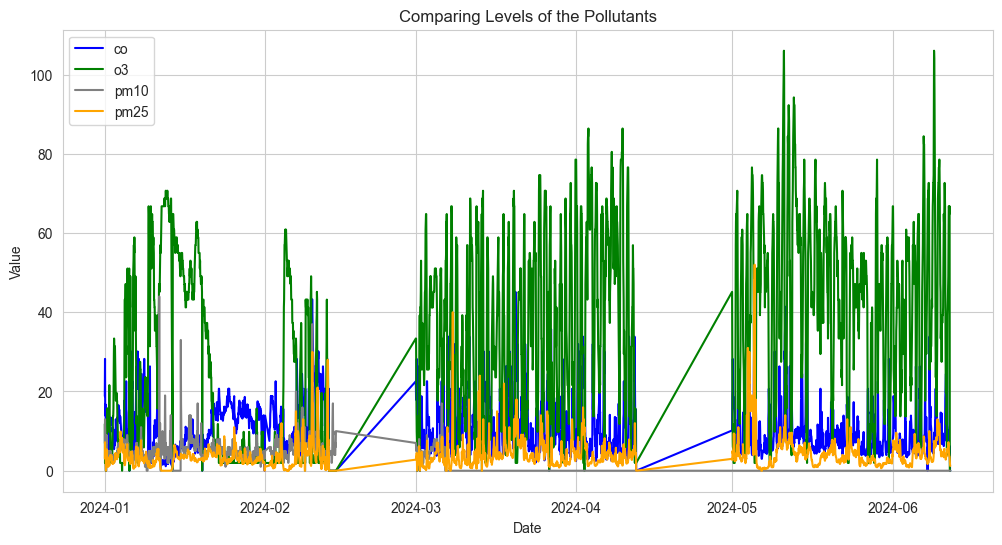

In [65]:
#set style to white grid
from cProfile import label


sns.set_style('whitegrid')

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_Cananda_2024_table, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data = Hope_Cananda_2024_table, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data = Hope_Cananda_2024_table, x='datetimeUtc', y='pm10', label='pm10', color='grey')
sns.lineplot(data = Hope_Cananda_2024_table, x='datetimeUtc', y='pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants')
plt.legend()
plt.show()

**Ozone (O3) Levels**:
   - O3 levels (green line) show the highest values and significant variability, with several periods of high concentration, especially from late February to early March and again from late April to June.

**PM10 and PM2.5 Levels**:
   - PM10 (gray line) and PM2.5 (orange line) levels remain relatively low compared to O3, with PM10 showing occasional spikes and PM2.5 maintaining a more consistent and lower level.

**Carbon Monoxide (CO) Levels**:
   - CO levels (blue line) are consistently low throughout the period, with values rarely exceeding 20, indicating minimal fluctuation and presence compared to other pollutants.

#### Comparing the AQI level of pollutants hourly

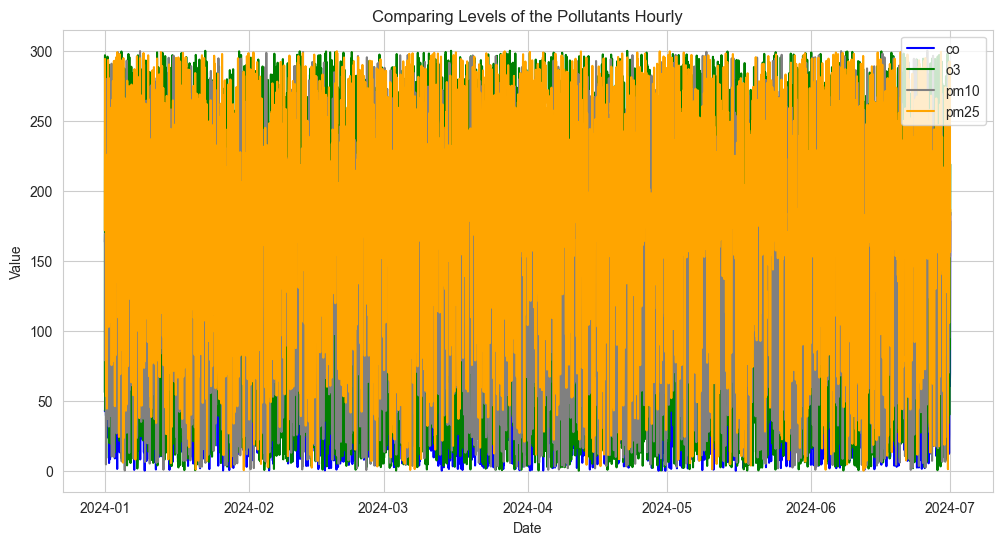

In [66]:
# comparing the level of each pollutant
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_AQI, x='datetimeUtc', y='AQI_co', label='co', color='blue')
sns.lineplot(data = Hope_AQI, x='datetimeUtc', y='AQI_o3', label='o3', color='green')
sns.lineplot(data = Hope_AQI, x='datetimeUtc', y='AQI_pm10', label='pm10', color='grey')
sns.lineplot(data = Hope_AQI, x='datetimeUtc', y='AQI_pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Hourly')
plt.legend()
plt.grid(True)
plt.show()

### Resampled Data

### Comparing the AQI level of pollutants resampled daily

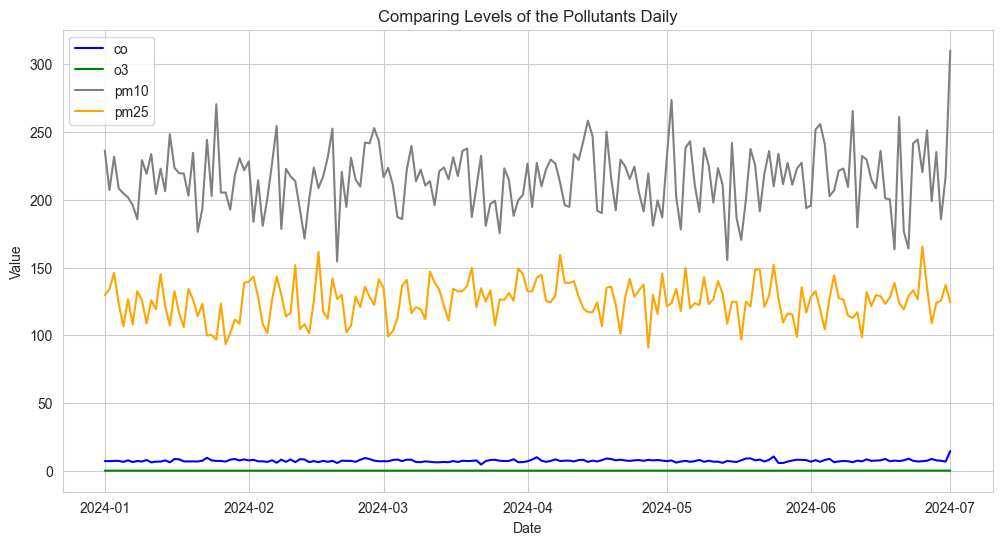

In [67]:
# Resampling the data to daily basis for a clearer view

Hope_canda_resampled_daily =Hope_AQI.resample('D', on='datetimeUtc').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data =Hope_canda_resampled_daily, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data =Hope_canda_resampled_daily, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data =Hope_canda_resampled_daily, x='datetimeUtc', y='pm10', label='pm10', color='grey')
sns.lineplot(data =Hope_canda_resampled_daily, x='datetimeUtc', y='pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Daily')
plt.legend()
plt.show()

##Low and stable levels of CO and O3 indicate generally good air quality.

High and variable levels of PM10 and PM2.5 suggest significant pollution from sources like construction and vehicular emissions, posing serious health risks.

Urgent measures are needed to control these pollutants and protect public health.

### Comparing AQI levels of pollutants resampled monthly

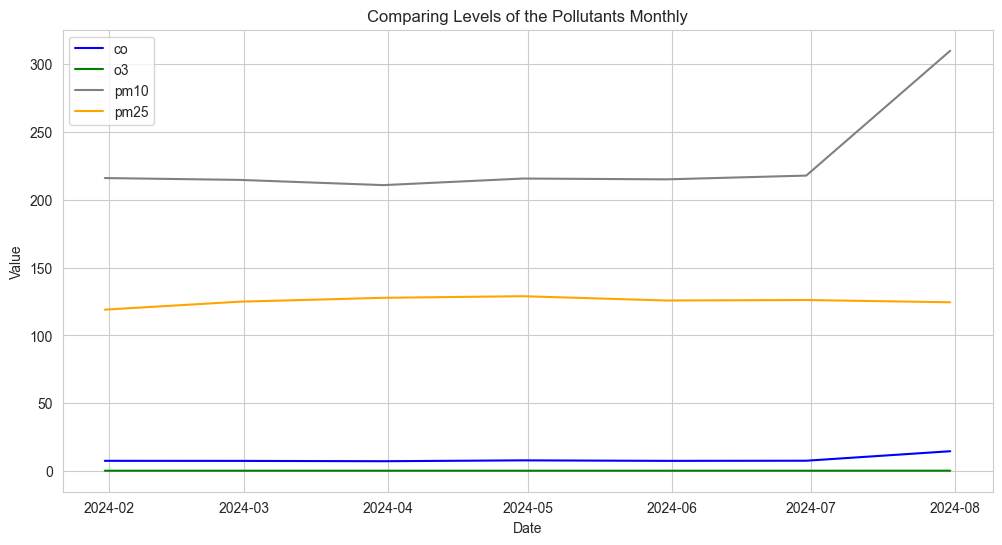

In [68]:
# resampling it to a monthly basis
Hope_canda_resampled_mounthly =Hope_AQI.resample('M', on='datetimeUtc').mean()


# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_canda_resampled_mounthly, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data = Hope_canda_resampled_mounthly, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data = Hope_canda_resampled_mounthly, x='datetimeUtc', y='pm10', label='pm10', color='grey')
sns.lineplot(data = Hope_canda_resampled_mounthly, x='datetimeUtc', y='pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Monthly')
plt.legend()
plt.show()


### Interpretation of Monthly Pollutant Levels:

- **CO and O3:** 
  - Levels are low and stable throughout the months, indicating good air quality in terms of these pollutants.

- **PM10 and PM2.5:** 
  - Both pollutants show consistently high levels, with PM10 (grey line) being the highest.
  - A noticeable drop in PM2.5 (orange line) and PM10 levels towards the end of the period suggests improvements or changes in pollution sources or control measures.

- **Overall:**
  - High levels of particulate matter (PM10 and PM2.5) indicate significant pollution, posing health risks.
  - The drop towards the end of the period indicates potential improvements in air quality or effective implementation of pollution control strategies.

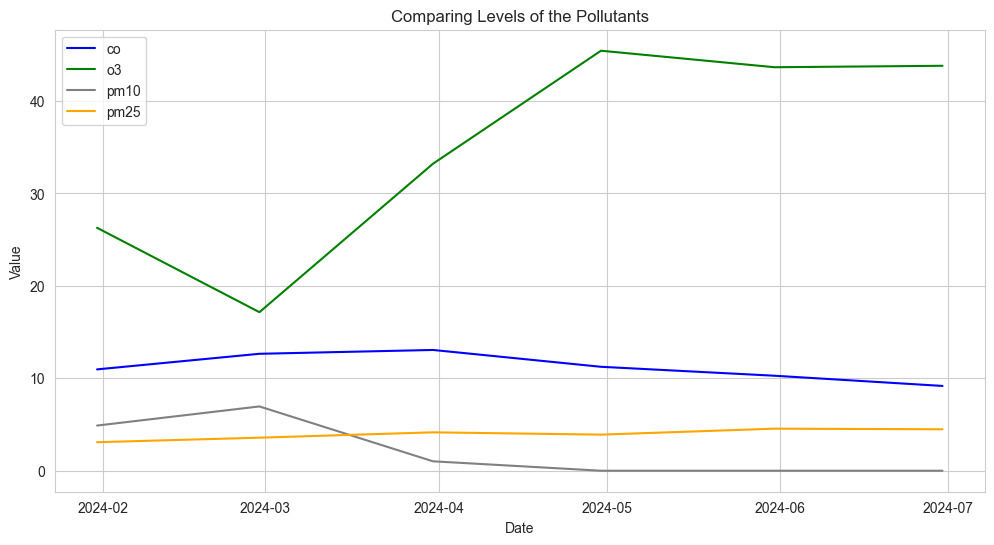

In [69]:
# changing the utc column to datetime index
Hope_Cananda_2024_table['datetimeUtc'] = pd.to_datetime(Hope_Cananda_2024_table['datetimeUtc'])

# setting the utc column to index
Hope_Cananda_2024_table.set_index('datetimeUtc', inplace=True)

# resample to monthly frequency using the mean as an aggredation
Hope_Cananda_2024_table_resampled = Hope_Cananda_2024_table.resample('M').mean(numeric_only=True)

# plotting the lineplot with the resamples data
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_Cananda_2024_table_resampled, x='datetimeUtc', y='co', label='co', color='blue')
sns.lineplot(data = Hope_Cananda_2024_table_resampled, x='datetimeUtc', y='o3', label='o3', color='green')
sns.lineplot(data = Hope_Cananda_2024_table_resampled, x='datetimeUtc', y='pm10', label='pm10', color='grey')
sns.lineplot(data = Hope_Cananda_2024_table_resampled, x='datetimeUtc', y='pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants')
plt.legend()
plt.show()

### interpreation:
#The line representing ozone (O3)  levels are represented by a green line that shows significant variability. There is a sharp decline from February to April, reaching its lowest point in April, followed by a dramatic increase from April through July.

#The line representing pm25 remains relatively constant and low from February to May, then experiences a steep rise starting in May, peaking in June, and maintaining this high level into July.

### Correlation Heatmap for the pollutants

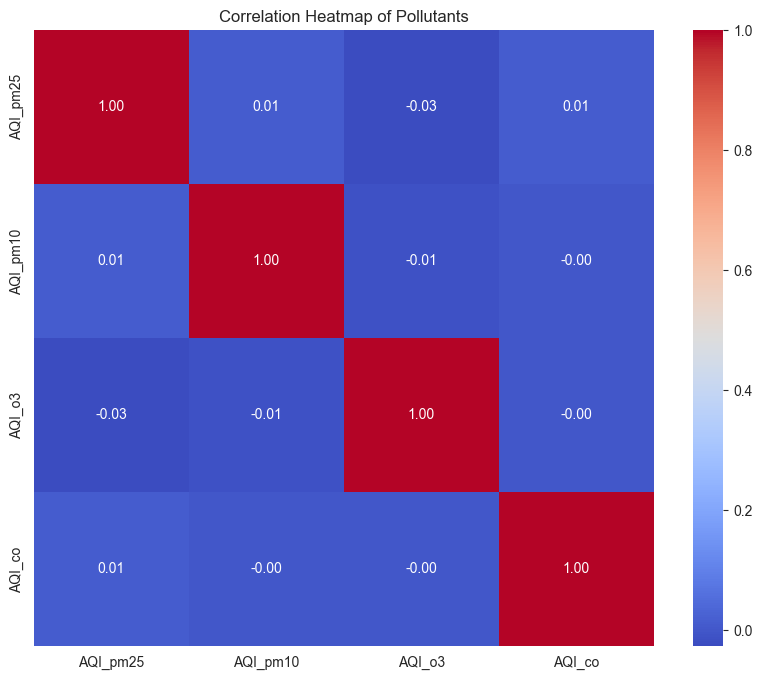

In [70]:
# correlation heatmap for the pollutants
# selecting the pollutants
pollutants = ['AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co']

# calculating the correlation matrix
corr_matrix = Hope_AQI[pollutants].corr()
# plotting a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Pollutants')
plt.show()


### A Lineplot for the AQI trends

#Here, we will create a lineplot to visualize the AQI trends for a six month time period.

#We will first visualize it hourly and then use the resampled format for daily for a clearer view.

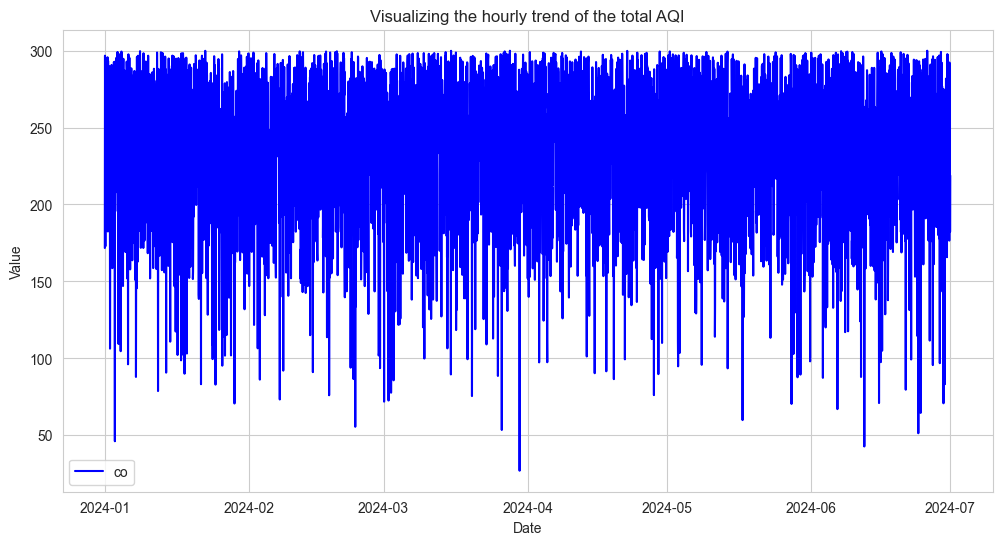

In [71]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_AQI, x='datetimeUtc', y='AQI', label='co', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()

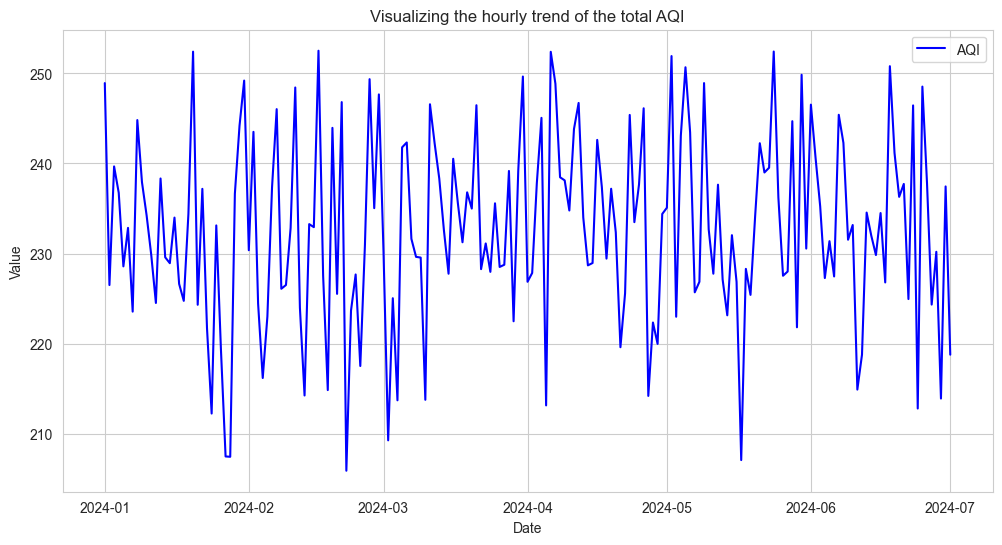

In [72]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Hope_canda_resampled_daily, x='datetimeUtc', y='AQI', label='AQI', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()

The graph displays the hourly trend of the total AQI from January 2024 to July 2024. Here are three key observations:

1. **Overall AQI Range**:
   - The AQI values fluctuate mostly between 220 and 260 throughout the period, indicating moderate air quality levels.

2. **Fluctuations and Trends**:
   - There are regular fluctuations in AQI values, with multiple peaks and troughs. This suggests that air quality varies frequently, possibly due to changing environmental or weather conditions.

3. **Significant Peak**:
   - Towards the end of the period, there is a significant spike where the AQI value exceeds 280. This indicates a period of particularly poor air quality, which may be due to a specific event or condition impacting the air quality during that time.

### Detecting Seasonality using Additive Decomposition.

Additive decomposition separates the time series into trend, seasonal, and residual components assuming that the time series is equal to trend + seasonality + noise

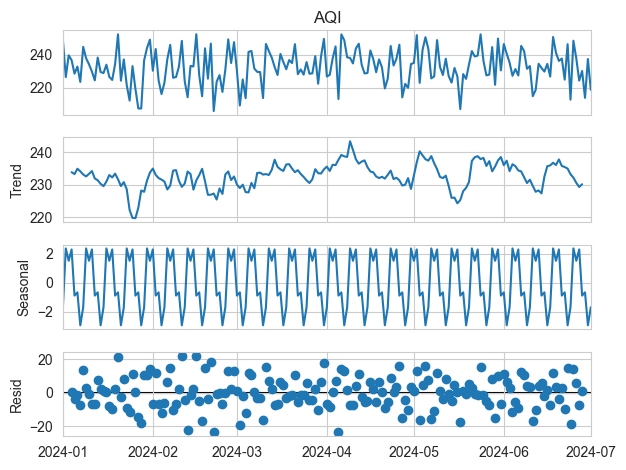

In [73]:
# checking for seasonality
result = seasonal_decompose(Hope_canda_resampled_daily['AQI'], model='additive')
result.plot()
plt.show()

The graph shows the decomposition of the AQI time series into its components: observed data, trend, seasonal, and residuals. Here are three key observations:

 **Observed AQI**:
   - The top panel shows the observed AQI values, which fluctuate between 220 and 275 with noticeable variability, and a significant spike towards the end.

**Trend Component**:
   - The trend component (second panel) shows the underlying pattern of the AQI data. It indicates a gradual rise and fall in AQI values, reflecting long-term changes in air quality over the period.

 **Seasonal and Residual Components**:
   - The seasonal component (third panel) displays regular patterns repeating over time, indicating periodic fluctuations in AQI, possibly due to daily or weekly cycles.
   - The residuals (bottom panel) represent the random noise in the data. They are scattered around zero with no apparent pattern, suggesting that the model has effectively captured the main trends and seasonal variations in the AQI data.

#### Calculating the daily averages

### Creating Subplots for the Daily AQI Levels

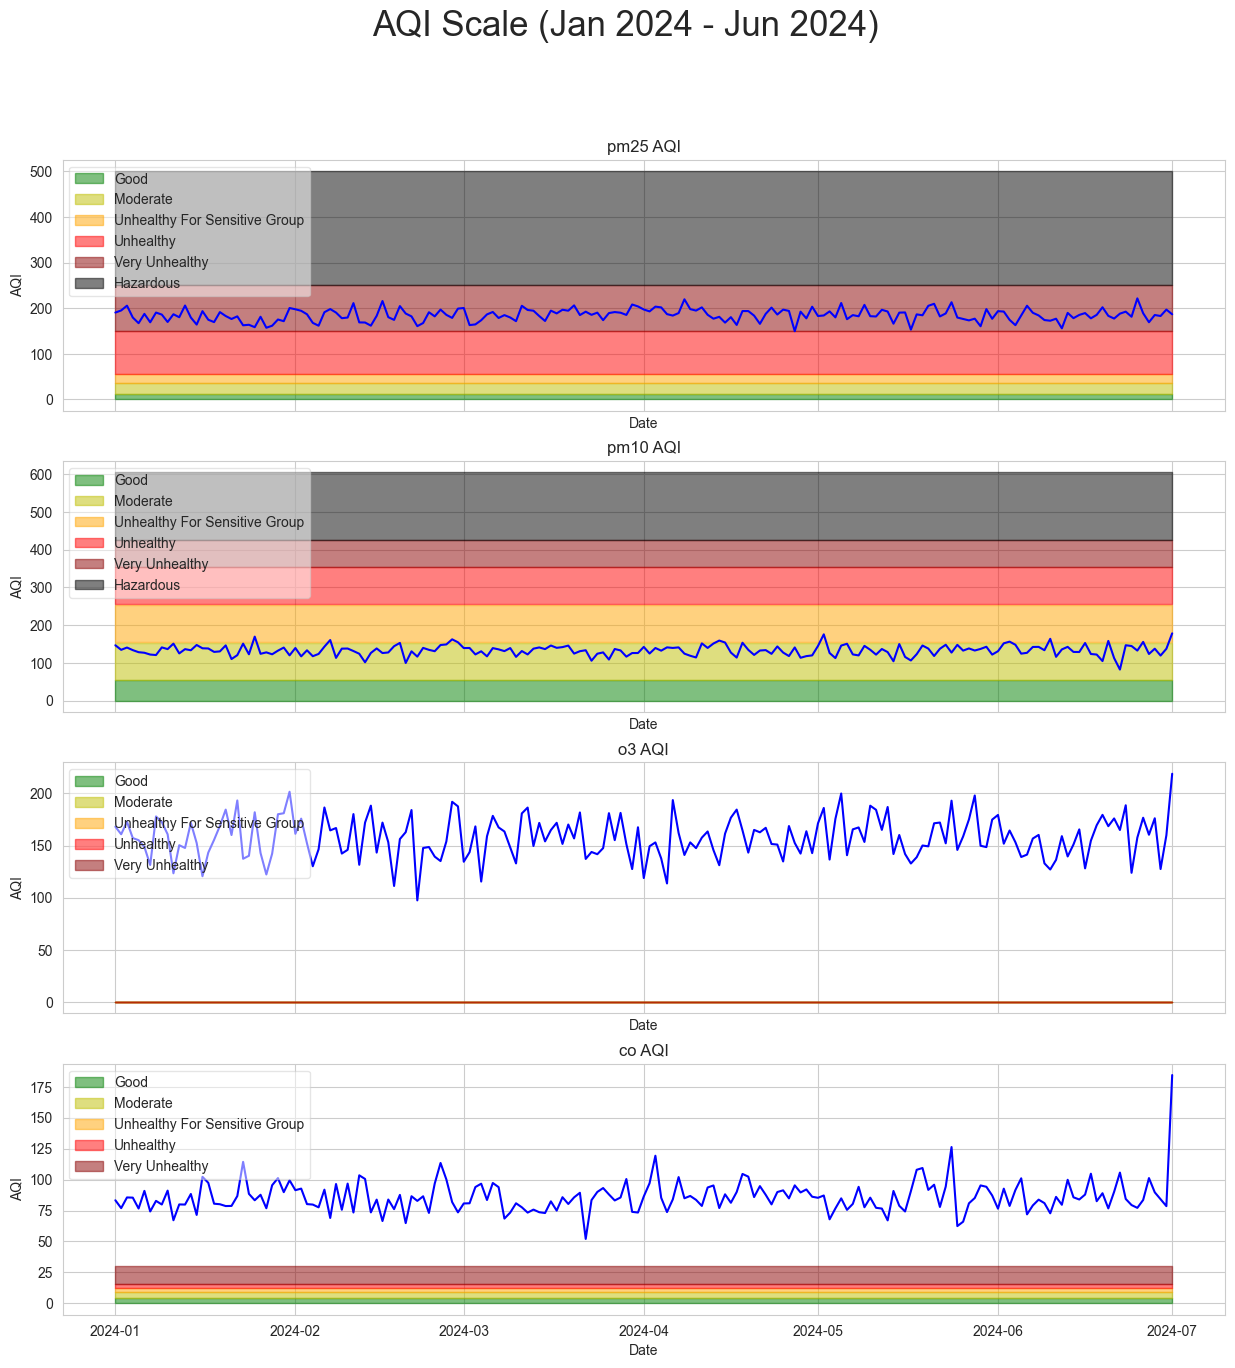

In [74]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 42.0, 0, 50), (42.1, 84.0, 51, 100), (84.1, 126.0, 101, 150), (126.1, 168.0, 151, 200), (168.1, 210.0, 201, 300)],
    'pm10': [(0.0, 54.0, 0, 50), (55.1, 154.0, 51, 100), (155.0, 254.0, 101, 150), (255.0, 354.0, 151, 200), (355.0, 424.0, 201, 300)],
    'o3': [(0.0, 26.67, 0, 50), (26.68, 53.33, 51, 100), (53.34, 80.0, 101, 150), (80.01, 106.67, 151, 200), (106.68, 133.33, 201, 300), (133.34, 160.0, 301, 500)],
    'co': [(0.0, 138.3, 0, 50), (138.4, 276.6, 51, 100), (276.7, 414.9, 101, 150), (415.0, 553.2, 151, 200), (553.3, 691.5, 201, 300), (691.6, 830.0, 301, 500)]
}

def index_scale(plotnumber, data, pollutant):
    if pollutant == 'pm25':
        scales = [(0, 12, 'Good', 'g'), (12.1, 35.4, 'Moderate', 'y'), (35.5, 55.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (55.5, 150.4, 'Unhealthy', 'r'), (150.5, 250.4, 'Very Unhealthy', 'darkred'), (250.5, 500.4, 'Hazardous', 'black')]
    elif pollutant == 'pm10':
        scales = [(0, 54, 'Good', 'g'), (55, 154, 'Moderate', 'y'), (155, 254, 'Unhealthy For Sensitive Group', 'orange'),
                  (255, 354, 'Unhealthy', 'r'), (355, 424, 'Very Unhealthy', 'darkred'), (425, 604, 'Hazardous', 'black')]
    elif pollutant == 'o3':
        scales = [(0.000, 0.054, 'Good', 'g'), (0.055, 0.070, 'Moderate', 'y'), (0.071, 0.085, 'Unhealthy For Sensitive Group', 'orange'),
                  (0.086, 0.105, 'Unhealthy', 'r'), (0.106, 0.200, 'Very Unhealthy', 'darkred')]
    elif pollutant == 'co':
        scales = [(0.0, 4.4, 'Good', 'g'), (4.5, 9.4, 'Moderate', 'y'), (9.5, 12.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (12.5, 15.4, 'Unhealthy', 'r'), (15.5, 30.4, 'Very Unhealthy', 'darkred')]
    
    for scale in scales:
        axs[plotnumber].fill_between(x=data.index, y1=scale[0], y2=scale[1], alpha=0.5, label=scale[2], color=scale[3])
    axs[plotnumber].set_title(f'{pollutant} AQI')
    axs[plotnumber].legend(loc='upper left', framealpha=0.5)
    axs[plotnumber].set_xlabel('Date')
    axs[plotnumber].set_ylabel('AQI')

# Create subplots to visualize the AQI data from January to June 2024
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(15, 15))
fig.suptitle('AQI Scale (Jan 2024 - Jun 2024)', fontsize=25)
pollutants = ['pm25', 'pm10', 'o3', 'co']

for i, pollutant in enumerate(pollutants):
    axs[i].plot(Hope_canda_resampled_daily[f'AQI_{pollutant}'], color='blue')
    index_scale(i, Hope_canda_resampled_daily, pollutant)

plt.show()


 **PM2.5 AQI**:
   - The PM2.5 levels (top panel) consistently fall within the "Moderate" (yellow) to "Unhealthy for Sensitive Groups" (orange) range, with occasional spikes into the "Unhealthy" (red) range. This indicates that PM2.5 levels pose a moderate to high health risk, especially for sensitive groups.

 **PM10 AQI**:
   - The PM10 levels (second panel) are mostly in the "Good" (green) to "Moderate" (yellow) range, with a few instances reaching the "Unhealthy for Sensitive Groups" (orange) range. The levels are relatively stable, indicating lower overall risk compared to PM2.5.

**O3 and CO AQI**:
   - O3 levels (third panel) show significant variability, often fluctuating between the "Good" (green), "Moderate" (yellow), and "Unhealthy for Sensitive Groups" (orange) ranges. There are occasional spikes into the "Unhealthy" (red) range, indicating episodes of poor air quality.
   - CO levels (bottom panel) remain largely in the "Good" (green) to "Moderate" (yellow) range, with occasional peaks into the "Unhealthy for Sensitive Groups" (orange) range. This suggests that CO levels are generally low, posing a minimal health risk.

###  Comparing the Levels of the pollutant in Hope

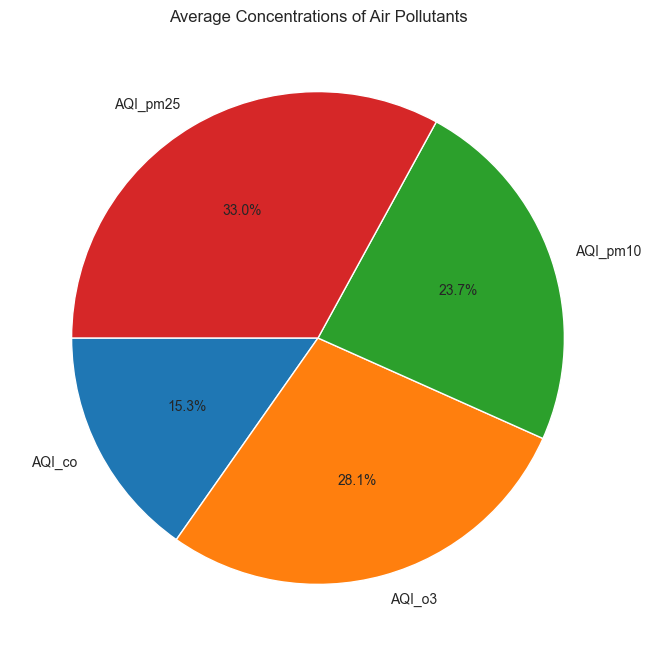

In [75]:
# creating a piechart to comare the levels of the pollutants

# Calculate average values
average_values =Hope_AQI[['AQI_co', 'AQI_o3', 'AQI_pm10', 'AQI_pm25']].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=180) # type: ignore
plt.title('Average Concentrations of Air Pollutants')
plt.show()

The pie chart shows the average concentrations of various air pollutants (PM2.5, PM10, O3, and CO) over a certain period:

**PM2.5**:
   - PM2.5 accounts for the largest proportion of the average concentrations, making up 32.9% of the total. This indicates that PM2.5 is a significant contributor to overall air pollution.

**Ozone (O3)**:
   - O3 is the second largest contributor, representing 28.1% of the average concentrations. This suggests that ozone pollution is also a major concern in the area being studied.

**PM10 and CO**:
   - PM10 and CO account for 23.7% and 15.4% of the average concentrations, respectively. While these pollutants are less prominent compared to PM2.5 and O3, they still contribute significantly to the overall air quality.